## INSTALL LIBRARIES AND DEPENDENCIES ##

In [2]:
# Install the required libraries
!pip install prophet
!pip install yfinance

# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import hvplot.pandas
import yfinance as yf
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts
from pmdarima import auto_arima 

## FETCH HISTORICAL DATA ##

In [3]:
#Fetch historical data for SP500
sp500 = yf.Ticker('^GSPC')
sp500_hist = sp500.history(period='5y')
# Save the data to a CSV file
sp500_hist.to_csv('SP500_5y.csv')
# Read the CSV file into a DataFrame
sp500_data = pd.read_csv('SP500_5y.csv')

# Fetch historical data for WTI crude oil
crude_oil = yf.Ticker('CL=F')  # 'CL=F' is the ticker symbol for WTI crude oil
crude_oil_hist = crude_oil.history(period='5y')
# Save the data to a CSV file
crude_oil_hist.to_csv('crude_oil_5y.csv')
# Read the CSV file into a DataFrame
crude_oil_data = pd.read_csv('crude_oil_5y.csv')

# Fetch historical data for the spot price of gold
gold = yf.Ticker('GC=F')  # 'GC=F' is the ticker symbol for spot gold
gold_hist = gold.history(period='5y')
# Save the data to a CSV file
gold_hist.to_csv('gold_spot_5y.csv')
# Read the CSV file into a DataFrame
gold_data = pd.read_csv('gold_spot_5y.csv')

## READ AND CONVERT TO DATAFRAME ##

In [4]:
# Read data from SP500_5y.csv into a DataFrame
df_SP500 = pd.read_csv('SP500_5y.csv', index_col='Date', parse_dates=True)
# Read data from crude_oil_5y.csv into a DataFrame
df_crude_oil = pd.read_csv('crude_oil_5y.csv', index_col='Date', parse_dates=True)
# Read data from gold_spot_5y.csv into a DataFrame
df_gold_spot = pd.read_csv('gold_spot_5y.csv', index_col='Date', parse_dates=True)

## SHOW DATA SP500 ##

In [5]:
print(df_SP500)

                                  Open         High          Low        Close  \
Date                                                                            
2019-02-11 00:00:00-05:00  2712.399902  2718.050049  2703.790039  2709.800049   
2019-02-12 00:00:00-05:00  2722.610107  2748.189941  2722.610107  2744.729980   
2019-02-13 00:00:00-05:00  2750.300049  2761.850098  2748.629883  2753.030029   
2019-02-14 00:00:00-05:00  2743.500000  2757.899902  2731.229980  2745.729980   
2019-02-15 00:00:00-05:00  2760.239990  2775.659912  2760.239990  2775.600098   
...                                ...          ...          ...          ...   
2024-02-02 00:00:00-05:00  4916.060059  4975.290039  4907.990234  4958.609863   
2024-02-05 00:00:00-05:00  4957.189941  4957.189941  4918.089844  4942.810059   
2024-02-06 00:00:00-05:00  4950.160156  4957.770020  4934.879883  4954.229980   
2024-02-07 00:00:00-05:00  4973.049805  4999.890137  4969.049805  4995.060059   
2024-02-08 00:00:00-05:00  4

## PLOT SP500 DATA USING HVPLOT ##

In [6]:
df_SP500.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## SHOW DATA CRUDE OIL ##

In [7]:
print(df_crude_oil)

                                Open       High        Low      Close  Volume  \
Date                                                                            
2019-02-08 00:00:00-05:00  52.590000  52.990002  52.080002  52.720001  621003   
2019-02-11 00:00:00-05:00  52.660000  52.779999  51.230000  52.410000  750242   
2019-02-12 00:00:00-05:00  52.470001  54.049999  52.290001  53.099998  708312   
2019-02-13 00:00:00-05:00  53.349998  54.599998  53.270000  53.900002  706552   
2019-02-14 00:00:00-05:00  53.959999  54.680000  53.080002  54.410000  623546   
...                              ...        ...        ...        ...     ...   
2024-02-02 00:00:00-05:00  73.910004  74.519997  71.790001  72.279999  467768   
2024-02-05 00:00:00-05:00  72.750000  73.279999  71.410004  72.779999  350843   
2024-02-06 00:00:00-05:00  72.760002  73.820000  72.379997  73.309998  310955   
2024-02-07 00:00:00-05:00  73.500000  74.220001  73.230003  73.860001  310955   
2024-02-08 00:00:00-05:00  7

## PLOT CRUDE OIL DATA USING HVPLOT ##

In [8]:
df_crude_oil.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## SHOW DATA GOLD SPOT ##

In [9]:
print(df_gold_spot)

                                  Open         High          Low        Close  \
Date                                                                            
2019-02-08 00:00:00-05:00  1309.500000  1314.000000  1307.800049  1313.699951   
2019-02-11 00:00:00-05:00  1313.400024  1313.400024  1304.699951  1307.000000   
2019-02-12 00:00:00-05:00  1310.000000  1312.000000  1307.599976  1309.199951   
2019-02-13 00:00:00-05:00  1311.599976  1316.000000  1308.099976  1310.800049   
2019-02-14 00:00:00-05:00  1305.000000  1311.800049  1301.599976  1309.800049   
...                                ...          ...          ...          ...   
2024-02-02 00:00:00-05:00  2054.800049  2055.899902  2027.699951  2036.099976   
2024-02-05 00:00:00-05:00  2038.900024  2040.800049  2013.800049  2025.699951   
2024-02-06 00:00:00-05:00  2025.900024  2037.300049  2025.900024  2034.500000   
2024-02-07 00:00:00-05:00  2032.800049  2039.500000  2032.699951  2035.199951   
2024-02-08 00:00:00-05:00  2

## PLOT GOLD SPOT DATA USING HVPLOT ##

In [10]:
df_gold_spot.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

## CONCAT ALL 3 DATAFRAMES ##

In [11]:

# Concatenate the three DataFrames
combined_data = pd.concat([sp500_data['Close'], crude_oil_data['Close'], gold_data['Close']], axis=1)
combined_data.columns = ['S&P 500', 'Crude Oil', 'Gold']
combined_plot = combined_data.hvplot(title="Combined Data")

## PLOT ALL 3 USING HVPLOT ##

In [12]:
combined_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

## READ IN SP500 CSV FILE FOR PROPHET MODELING ##

In [13]:

# Read the CSV file into a DataFrame
sp500_data = pd.read_csv('SP500_5y.csv')

In [14]:
# Read the CSV file into a DataFrame
sp500_data = pd.read_csv('SP500_5y.csv')

# Convert 'Date' column to datetime format with UTC timezone
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], utc=True)

# Prepare the DataFrame for Prophet
sp500_prophet_df = sp500_data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone information from the 'ds' column
sp500_prophet_df['ds'] = sp500_prophet_df['ds'].dt.tz_localize(None)

# Initialize the Prophet model
sp500_model = Prophet()

# Fit the model with your DataFrame
sp500_model.fit(sp500_prophet_df)

# Create a DataFrame for future predictions
sp500_future = sp500_model.make_future_dataframe(periods=365)

# Use the model to make predictions
sp500_forecast = sp500_model.predict(sp500_future)

# Plot the forecast using hvplot
sp500_forecast_plot = sp500_forecast.hvplot(
    x='ds', 
    y=['yhat_lower', 'yhat', 'yhat_upper'], 
    title='S&P 500 Price Forecast',
    xlabel='Date',
    ylabel='Price',
    line_width=2
)

# Print the forecast plot
sp500_forecast_plot

17:18:45 - cmdstanpy - INFO - Chain [1] start processing
17:18:46 - cmdstanpy - INFO - Chain [1] done processing


:NdOverlay   [Variable]
   :Curve   [ds]   (value)

/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


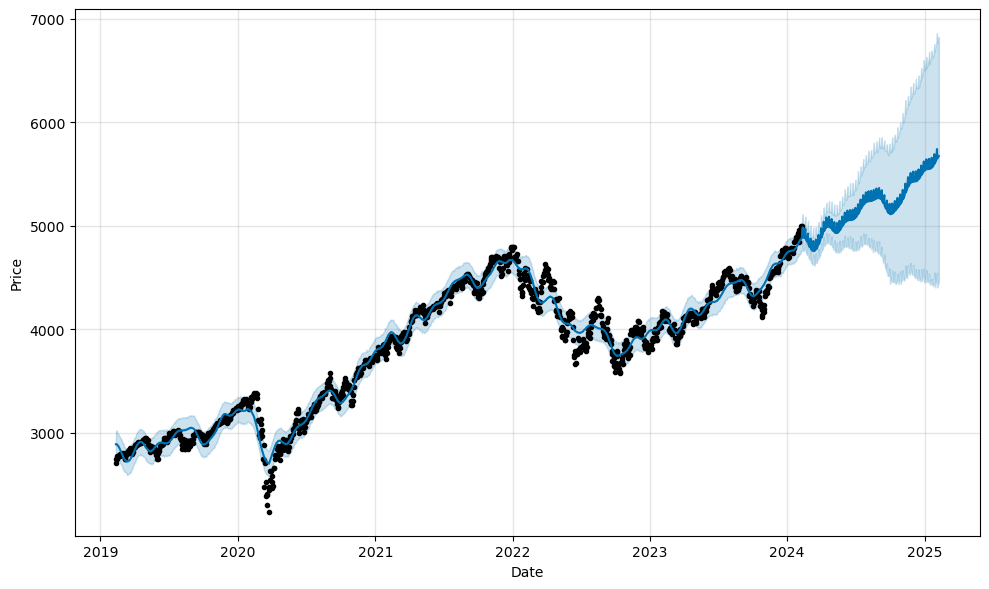

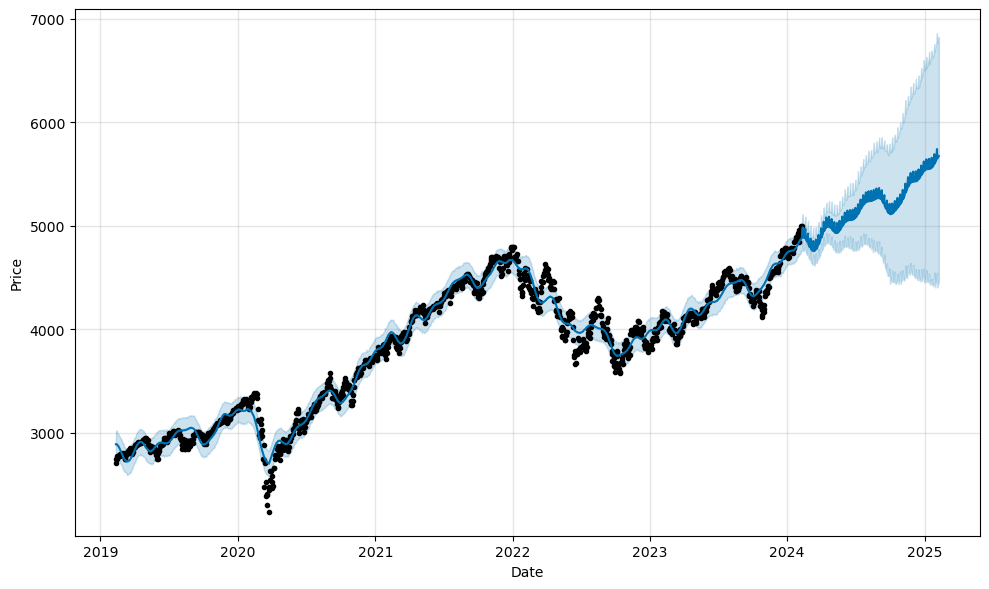

In [15]:
# Plot the forecast using hvplot for Prophet predictions
prophet_forecast_plot = sp500_model.plot(sp500_forecast, xlabel='Date', ylabel='Price')
prophet_forecast_plot

## READ IN CRUDE OIL CSV FOR PROPHET ##

In [16]:
# Read the CSV file into a DataFrame
crude_oil_data = pd.read_csv('crude_oil_5y.csv')

In [17]:
# Convert 'Date' column to datetime format with UTC timezone
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'], utc=True)

# Prepare the DataFrame for Prophet
crude_oil_prophet_df = crude_oil_data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone information from the 'ds' column
crude_oil_prophet_df['ds'] = crude_oil_prophet_df['ds'].dt.tz_localize(None)

# Initialize the Prophet model
crude_oil_model = Prophet()

# Fit the model with your DataFrame
crude_oil_model.fit(crude_oil_prophet_df)

# Create a DataFrame for future predictions
crude_oil_future = crude_oil_model.make_future_dataframe(periods=365)

# Use the model to make predictions
crude_oil_forecast = crude_oil_model.predict(crude_oil_future)

# Plot the forecast using hvplot
crude_oil_forecast_plot = crude_oil_forecast.hvplot(
    x='ds', 
    y=['yhat_lower', 'yhat', 'yhat_upper'], 
    title='Crude Oil Price Forecast',
    xlabel='Date',
    ylabel='Price',
    line_width=2
)

# Print the forecast plot
crude_oil_forecast_plot


17:18:48 - cmdstanpy - INFO - Chain [1] start processing
17:18:48 - cmdstanpy - INFO - Chain [1] done processing


:NdOverlay   [Variable]
   :Curve   [ds]   (value)

/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


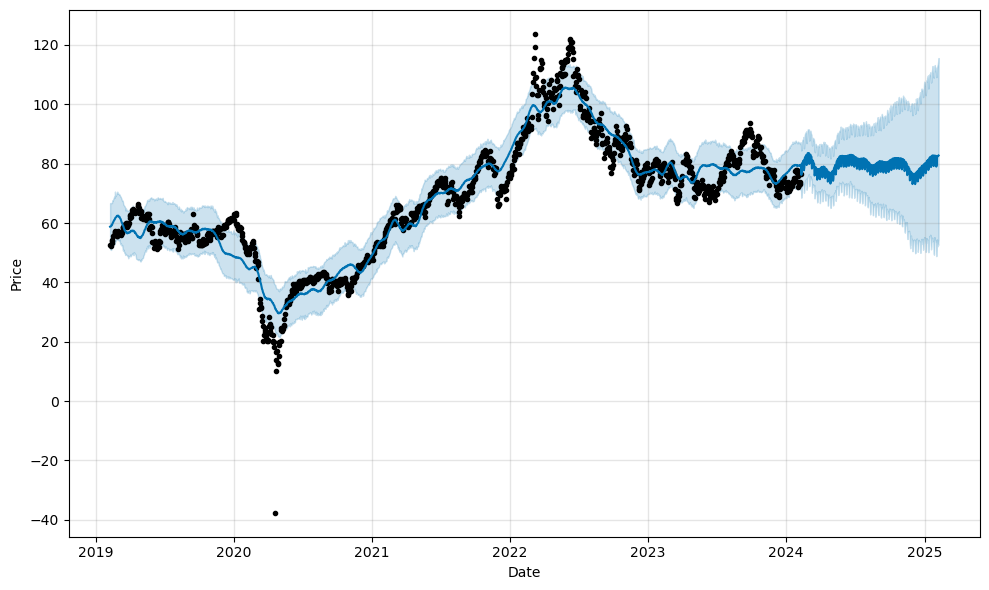

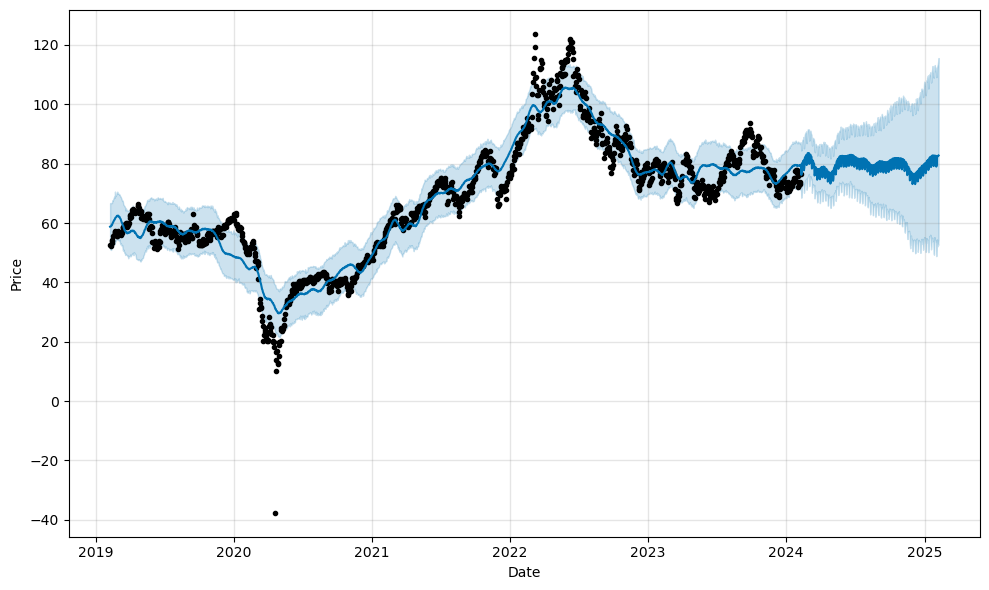

In [18]:
# Plot the forecast using hvplot for Prophet predictions
prophet_forecast_plot = crude_oil_model.plot(crude_oil_forecast, xlabel='Date', ylabel='Price')
prophet_forecast_plot

## READ IN GOLD CSV FOR PROPHET ##

In [19]:
# Read the CSV file into a DataFrame
gold_data = pd.read_csv('gold_spot_5y.csv')

In [20]:

# Convert 'Date' column to datetime format with UTC timezone
gold_data['Date'] = pd.to_datetime(gold_data['Date'], utc=True)

# Prepare the DataFrame for Prophet
gold_prophet_df = gold_data.rename(columns={'Date': 'ds', 'Close': 'y'})

# Remove timezone information from the 'ds' column
gold_prophet_df['ds'] = gold_prophet_df['ds'].dt.tz_localize(None)

# Initialize the Prophet model
gold_model = Prophet()

# Fit the model with your DataFrame
gold_model.fit(gold_prophet_df)

# Create a DataFrame for future predictions
gold_future = gold_model.make_future_dataframe(periods=365)

# Use the model to make predictions
gold_forecast = gold_model.predict(gold_future)

# Plot the forecast using hvplot
gold_forecast_plot = gold_forecast.hvplot(
    x='ds', 
    y=['yhat_lower', 'yhat', 'yhat_upper'], 
    title='Gold Price Forecast',
    xlabel='Date',
    ylabel='Price',
    line_width=2
)

# Print the forecast plot
gold_forecast_plot

17:18:49 - cmdstanpy - INFO - Chain [1] start processing
17:18:50 - cmdstanpy - INFO - Chain [1] done processing


:NdOverlay   [Variable]
   :Curve   [ds]   (value)

/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/calvarez/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


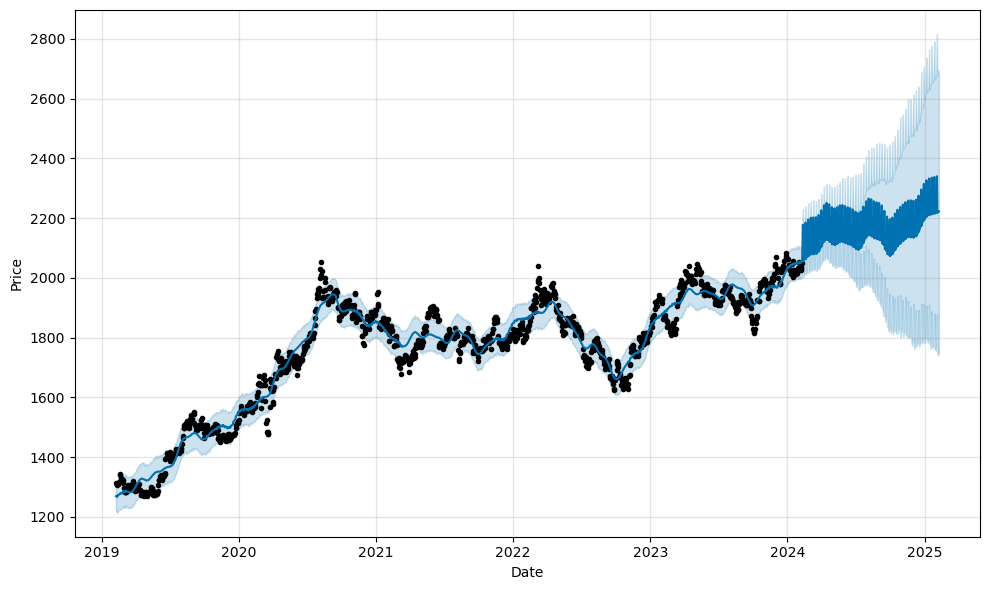

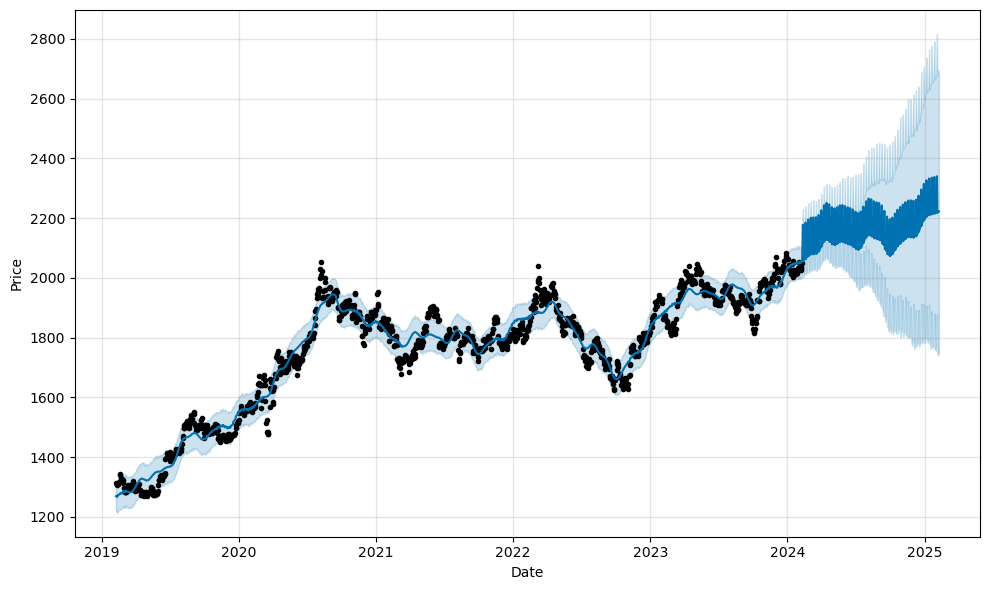

In [21]:
# Plot the forecast using hvplot for Prophet predictions
prophet_forecast_plot = gold_model.plot(gold_forecast, xlabel='Date', ylabel='Price')
prophet_forecast_plot

## ARIMA MODEL ##

In [22]:
import pandas as pd
from pmdarima import auto_arima

# Read the CSV file into a DataFrame
sp500_data_data = pd.read_csv('SP500_5y.csv')

# Convert 'Date' column to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Set 'Date' column as index
sp500_data.set_index('Date', inplace=True)

# Select the target variable column ('Close')
y = sp500_data['Close']

# Fit ARIMA model
arima_model = auto_arima(y, seasonal=True, m=12)

# Forecast
forecast, conf_int = arima_model.predict(n_periods=365, return_conf_int=True)

# Create DataFrame for forecast
forecast_dates = pd.date_range(start=sp500_data.index[-1], periods=365, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot forecast
forecast_plot = forecast_df.hvplot(x='Date', y='Forecast', xlabel='Date', ylabel='SP500 Price', title='SP500 Price Forecast (ARIMA)', line_width=2)

# Print the forecast plot
forecast_plot


/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

:Curve   [Date]   (Forecast)

In [23]:
import pandas as pd
from pmdarima import auto_arima

# Read the CSV file into a DataFrame
gold_data = pd.read_csv('gold_spot_5y.csv')

# Convert 'Date' column to datetime format
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Set 'Date' column as index
gold_data.set_index('Date', inplace=True)

# Select the target variable column ('Close')
y = gold_data['Close']

# Fit ARIMA model
arima_model = auto_arima(y, seasonal=True, m=12)

# Forecast
forecast, conf_int = arima_model.predict(n_periods=365, return_conf_int=True)

# Create DataFrame for forecast
forecast_dates = pd.date_range(start=gold_data.index[-1], periods=365, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot forecast
forecast_plot = forecast_df.hvplot(x='Date', y='Forecast', xlabel='Date', ylabel='Gold Price', title='Gold Price Forecast (ARIMA)', line_width=2)

# Print the forecast plot
forecast_plot


/var/folders/yl/5xqpmy654v72wrc2y_mxtlnm0000gn/T/ipykernel_95258/481828883.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  gold_data['Date'] = pd.to_datetime(gold_data['Date'])
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/cal

:Curve   [Date]   (Forecast)

In [24]:
import pandas as pd
from pmdarima import auto_arima

# Read the CSV file into a DataFrame
crude_oil_data = pd.read_csv('crude_oil_5y.csv')

# Convert 'Date' column to datetime format
crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'])

# Set 'Date' column as index
crude_oil_data.set_index('Date', inplace=True)

# Select the target variable column ('Close')
y = crude_oil_data['Close']

# Fit ARIMA model
arima_model = auto_arima(y, seasonal=True, m=12)

# Forecast
forecast, conf_int = arima_model.predict(n_periods=365, return_conf_int=True)

# Create DataFrame for forecast
forecast_dates = pd.date_range(start=crude_oil_data.index[-1], periods=365, freq='D')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot forecast
forecast_plot = forecast_df.hvplot(x='Date', y='Forecast', xlabel='Date', ylabel='Crude Oil Price', title='Crude Oil Price Forecast (ARIMA)', line_width=2)

# Print the forecast plot
forecast_plot


/var/folders/yl/5xqpmy654v72wrc2y_mxtlnm0000gn/T/ipykernel_95258/3902835942.py:8: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise a warning unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  crude_oil_data['Date'] = pd.to_datetime(crude_oil_data['Date'])
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/calvarez/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):

:Curve   [Date]   (Forecast)

## COMBINE PREDICTIONS ##

In [25]:
# Combine predictions into DataFrames
predictions_arima_df = pd.DataFrame({'ARIMA_S&P500': sp500_forecast['yhat'],
                                     'ARIMA_CrudeOil': crude_oil_forecast['yhat'],
                                     'ARIMA_Gold': gold_forecast['yhat']})
predictions_prophet_df = pd.DataFrame({'Prophet_S&P500': sp500_forecast['yhat'],
                                       'Prophet_CrudeOil': crude_oil_forecast['yhat'],
                                       'Prophet_Gold': gold_forecast['yhat']})

# Plot predictions using hvplot
arima_plot = predictions_arima_df.hvplot()
prophet_plot = predictions_prophet_df.hvplot()

# Show the plots
arima_plot + prophet_plot


:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

## CALCULATE CORRELATION MATRIX FOR ARIMA & PROPHET ##

In [26]:
# Calculate correlation matrix for combined predictions
combined_correlation_matrix = predictions_arima_df.corrwith(predictions_prophet_df, axis=0)

print("Correlation between combined ARIMA and Prophet predictions:")
print(combined_correlation_matrix)

Correlation between combined ARIMA and Prophet predictions:
ARIMA_CrudeOil     NaN
ARIMA_Gold         NaN
ARIMA_S&P500       NaN
Prophet_CrudeOil   NaN
Prophet_Gold       NaN
Prophet_S&P500     NaN
dtype: float64


In [27]:
# Plot the combined forecasts using hvplot
combined_forecasts_plot = predictions_arima_df.hvplot(title='Combined ARIMA Predictions') * \
                          predictions_prophet_df.hvplot(title='Combined Prophet Predictions')

In [28]:
# Display the combined forecasts plot
combined_forecasts_plot

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [index]   (value)

In [31]:
# Plot the ARIMA predictions using hvplot
arima_predictions_plot = predictions_arima_df.hvplot(title='ARIMA Predictions')
arima_predictions_plot

:NdOverlay   [Variable]
   :Curve   [index]   (value)

/Users/calvarez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/calvarez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/calvarez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/calvarez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/calvarez/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: Future

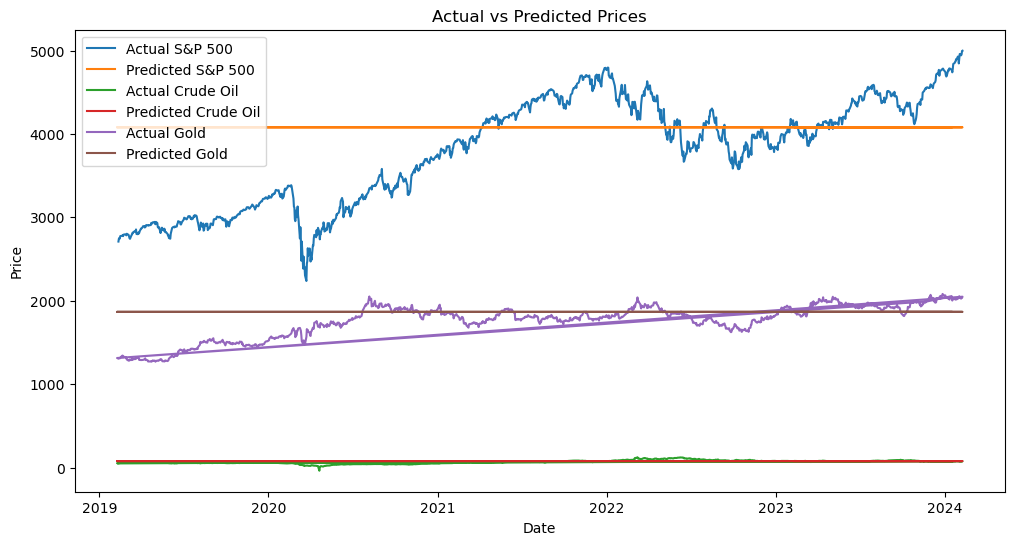

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read the CSV files into DataFrames
sp500_data = pd.read_csv('SP500_5y.csv', index_col='Date', parse_dates=True)
crude_oil_data = pd.read_csv('crude_oil_5y.csv', index_col='Date', parse_dates=True)
gold_data = pd.read_csv('gold_spot_5y.csv', index_col='Date', parse_dates=True)

# Concatenate the three DataFrames
combined_data = pd.concat([sp500_data['Close'], crude_oil_data['Close'], gold_data['Close']], axis=1)
combined_data.columns = ['S&P 500', 'Crude Oil', 'Gold']

# Split data into train and test sets
train_size = int(len(combined_data) * 0.8)

# Define a function to make predictions using ARIMA
def make_arima_predictions(data, asset_name):
    train, test = data[:train_size], data[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(5,1,0))
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
    
    return predictions

# Make predictions for all three assets
predictions = {}
for column in combined_data.columns:
    predictions[column] = make_arima_predictions(combined_data[column], column)

# Plot actual vs predicted for all three assets
plt.figure(figsize=(12, 6))
for column, pred in predictions.items():
    plt.plot(combined_data.index, combined_data[column], label=f'Actual {column}')
    plt.plot(combined_data.index[train_size:], pred, label=f'Predicted {column}')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
